# Lesson 4 Lab

### For this exercise, we are going to take a look at several studies and outputs in order to get comfortable reading outputs and practicing hypothesis testing.

## Data output 1
This dataset examines the association between an outcome and generic variables x1, x2, x3
<img src='data/generic-output.png'>

#### Question 1.1 X6 has an association with the outcome of -0.2. Is this finding statistically significant? 

Answer: No, it has a p-value >0.05 and the CI crosses 0. 

#### Question 1.2 Which of the variables X1, X3, and X6 have a statistically significant finding? 

Answer: X1

#### Question 1.3 What does a 95% CI of 0.38-0.866 indicate? 

Answer: That if we repeated this study 100 times our point estimate would lie within that range 95 times

## Data Output 2 
This is a data set of different animals. We measured the brain size and body size of each animale in our data set. We aim to determine if there is an association between the body size and brain size of animals in our dataset.

<img src="data/body-size.png">

#### Question 2.1 What is the outcome in this model? 

Answer: brain size

#### Question 2.2 What is the predictor in this model? 


Answer: body size

#### Question 2.3 What is the association body and brain size? 


Answer: 0.97

#### Question 2.4 Is this relationship statistically significant? How did you decide?

Answer: yes p < 0.05

#### Question 2.5 is this relationship biologically significant? What other information would you need to decide this?


Answer: Unclear. We would need to understand more about the dataset, the animals in the dataset, how the dataset was collected etc.

## COE Prices 

Today we will be looking at COE prices https://data.gov.sg/dataset/coe-bidding-results

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
coe = pd.read_csv("data/coe-results.csv")

In [4]:
coe.head()

,month,bidding_no,vehicle_class,quota,bids_success,bids_received,premium
0,2010-01,1,Category A,1152,1145,1342,18502
1,2010-01,1,Category B,687,679,883,19190
2,2010-01,1,Category C,173,173,265,19001
3,2010-01,1,Category D,373,365,509,889
4,2010-01,1,Category E,586,567,1011,19889


In [5]:
coe_pivot = pd.pivot_table(coe, values='premium', columns='vehicle_class', index='month')
coe_pivot.head()

vehicle_class,Category A,Category B,Category C,Category D,Category E
month,,,,,
2010-01,19501.5,20795.0,19545.5,870.5,20894.0
2010-02,20164.5,23534.5,22445.5,926.5,23315.0
2010-03,24595.5,31239.0,29945.5,1179.5,34795.5
2010-04,32000.5,42751.0,36033.5,1237.0,46001.5
2010-05,26745.5,36300.0,30945.0,1282.0,39001.0


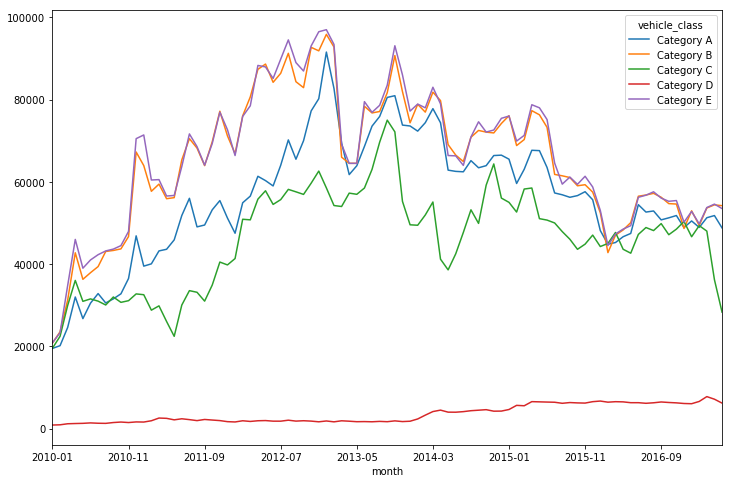

In [6]:
coe_pivot.plot(figsize=(12,8))
plt.show()

#### 1. Create a histogram plot of Category C prices 

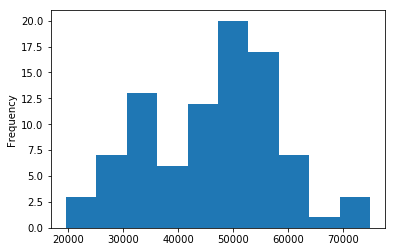

In [7]:
coe_pivot["Category C"].plot(kind="hist")

#### 2. Create combined density plots of Category A, B, C, and E prices

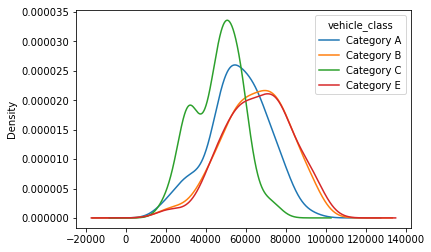

In [8]:
coe_pivot[["Category A", "Category B", "Category C", "Category E"]].plot(kind="density")
plt.show()

#### 3. Are the prices normally distributed? Compute their skew and kurtosis values 

In [9]:
coe_pivot.skew()

vehicle_class
Category A   -0.283474
Category B   -0.346584
Category C   -0.154958
Category D    0.449556
Category E   -0.259830
dtype: float64

In [10]:
coe_pivot.kurtosis()

vehicle_class
Category A   -0.045842
Category B   -0.162985
Category C   -0.475207
Category D   -1.517047
Category E   -0.185555
dtype: float64

In [11]:
coe_pivot.std()

vehicle_class
Category A    14874.356811
Category B    16226.100901
Category C    11891.774803
Category D     2131.317449
Category E    16461.342775
dtype: float64

#### 4. Are the prices of Category A and B vehicles significantly different? 

In [12]:
statistic, pvalue = stats.ttest_ind(coe_pivot["Category A"], coe_pivot["Category B"], equal_var=False)
print pvalue

0.000186632194949


#### 5. How about Category B and E?

In [13]:
statistic, pvalue = stats.ttest_ind(coe_pivot["Category E"], coe_pivot["Category B"])
print pvalue

0.679998632255


In [14]:
statistic, pvalue = stats.f_oneway(coe_pivot["Category B"], coe_pivot["Category E"])
print pvalue

0.679998632255
